### 1. Importation de packages

In [1]:
#Importion des packages
# 📦 Importation des packages essentiels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import warnings
warnings.filterwarnings('ignore')

### 2. Chargement de données

In [2]:
# Définir les noms de colonnes
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower',
    'weight', 'acceleration', 'model_year', 'origin', 'car_name'
]

data = []

with open("auto-mpg.data", "r") as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) >= 9:
            fixed_parts = parts[:8]
            car_name = ' '.join(parts[8:]).strip('"')
            fixed_parts.append(car_name)
            data.append(fixed_parts)

df = pd.DataFrame(data, columns=column_names)

for col in column_names[:-1]:  # Sauf car_name
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


### 3. Analyse de données

In [3]:
df.shape

(398, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [7]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [8]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [9]:
df_clean = df.dropna()

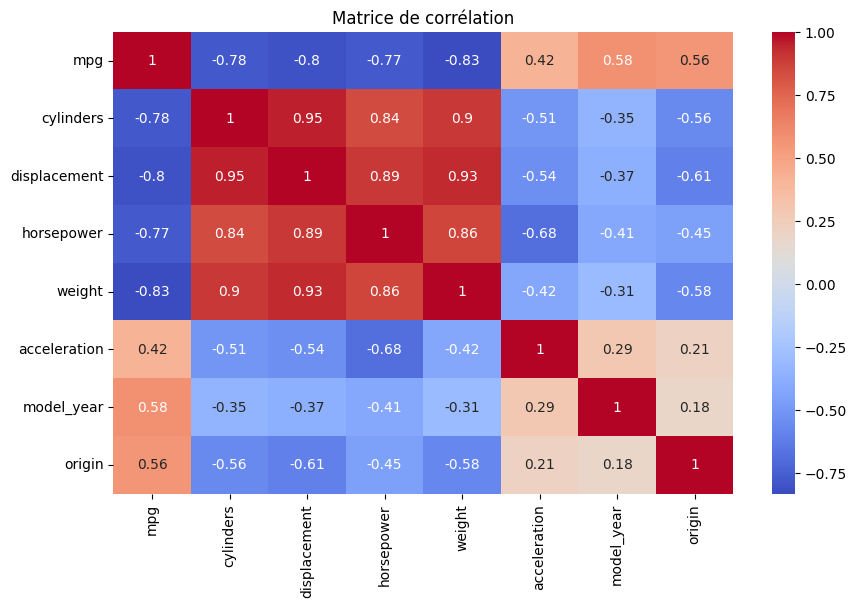

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

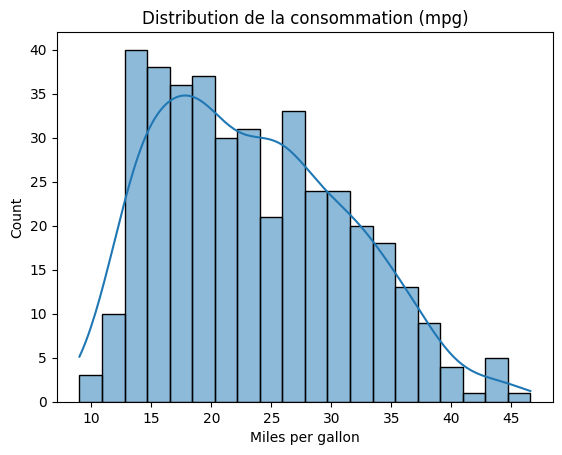

In [11]:
sns.histplot(df['mpg'], bins=20, kde=True)
plt.title("Distribution de la consommation (mpg)")
plt.xlabel("Miles per gallon")
plt.show()

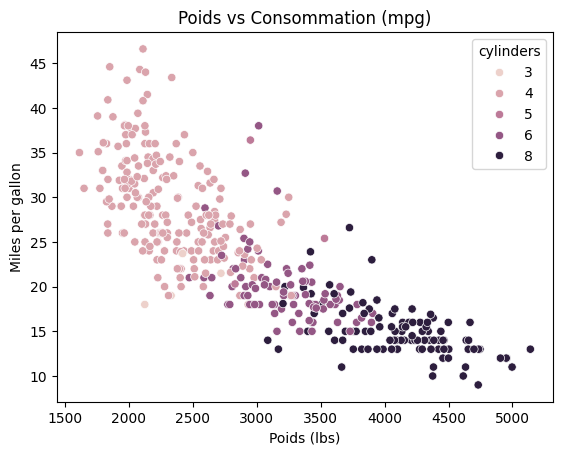

In [12]:
sns.scatterplot(data=df, x='weight', y='mpg', hue='cylinders')
plt.title("Poids vs Consommation (mpg)")
plt.xlabel("Poids (lbs)")
plt.ylabel("Miles per gallon")
plt.show()

In [13]:
df_clean = df.dropna()
df_clean.shape

(398, 9)

### 4. Division de donnéess d'entrainement

In [14]:
X = df.drop(['mpg', 'car_name'], axis=1)  # on enlève 'mpg' (la variable cible) et 'car_name' (non numérique)
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
np.isnan(y_train).any()
y.isna().sum()
X.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

### 5. Standarisation des données

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6. Régression

In [16]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

# SVR
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Afficher les résultats
for name, y_pred in [('Linear Regression', y_pred_lr), 
                     ('Decision Tree', y_pred_dt), 
                     ('SVR', y_pred_svr),
                     ('Random Forest', y_pred_rf)]:
    print(f"--- {name} ---")
    print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

--- Linear Regression ---
R2 Score: 0.8476
MSE: 8.1955

--- Decision Tree ---
R2 Score: 0.7920
MSE: 11.1843

--- SVR ---
R2 Score: 0.8732
MSE: 6.8153

--- Random Forest ---
R2 Score: 0.9143
MSE: 4.6072



### 7. Evaluation

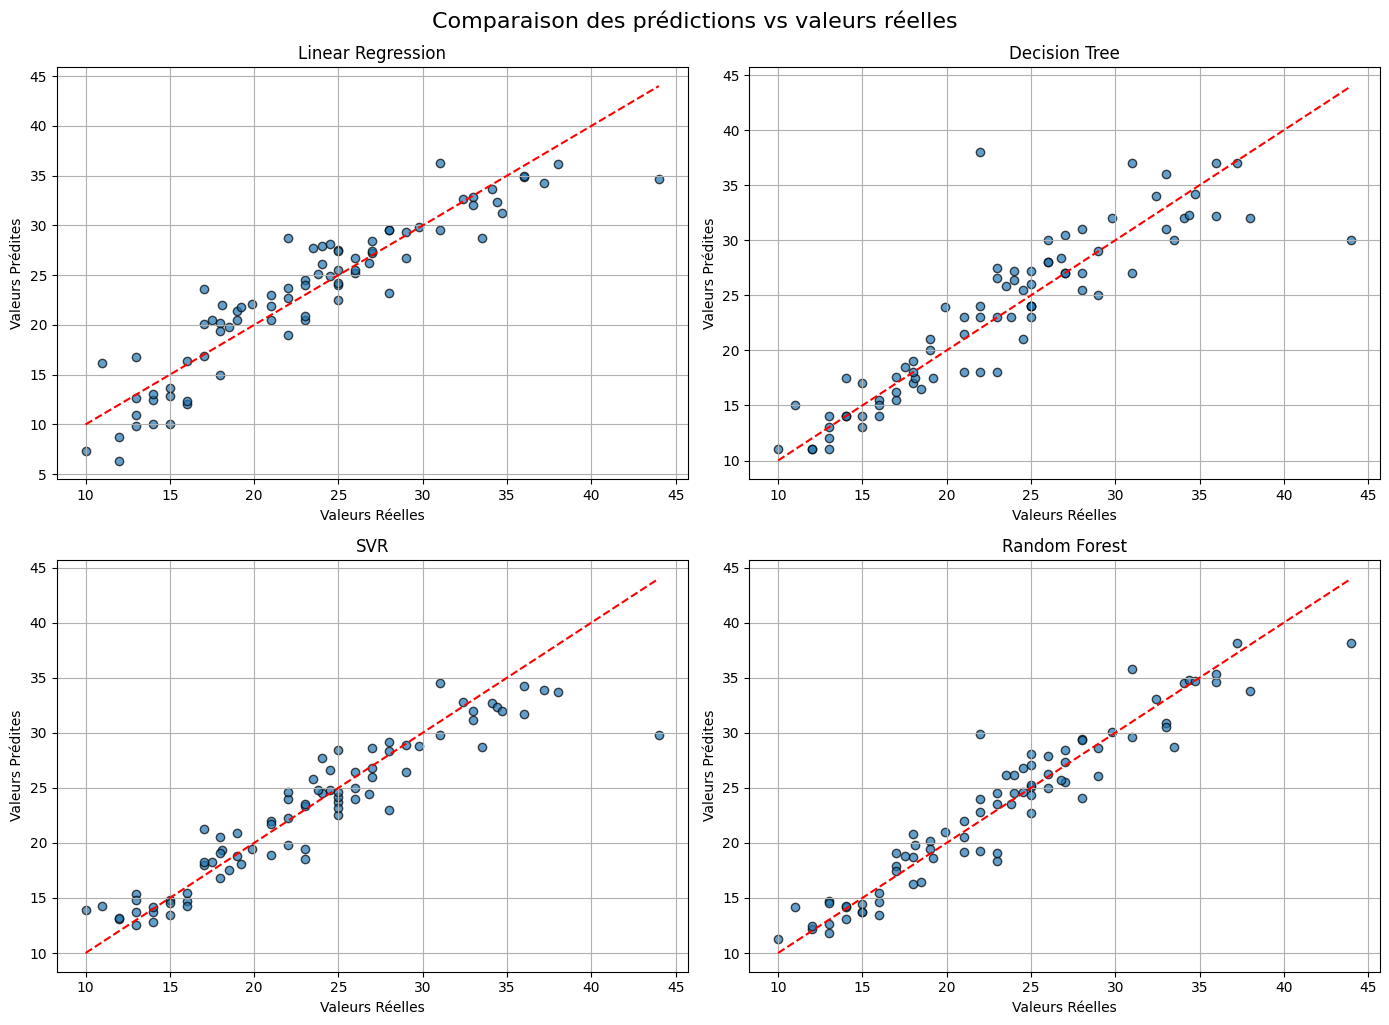

In [17]:
import matplotlib.pyplot as plt

# Liste des modèles et de leurs prédictions
model_names = ["Linear Regression", "Decision Tree", "SVR", "Random Forest"]
predictions = [y_pred_lr, y_pred_dt, y_pred_svr, y_pred_rf]

# Créer 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Boucle sur chaque modèle
for i, (name, y_pred) in enumerate(zip(model_names, predictions)):
    axes[i].scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ligne diagonale
    axes[i].set_title(f"{name}")
    axes[i].set_xlabel("Valeurs Réelles")
    axes[i].set_ylabel("Valeurs Prédites")
    axes[i].grid(True)

plt.tight_layout()
plt.suptitle("Comparaison des prédictions vs valeurs réelles", fontsize=16, y=1.02)
plt.show()


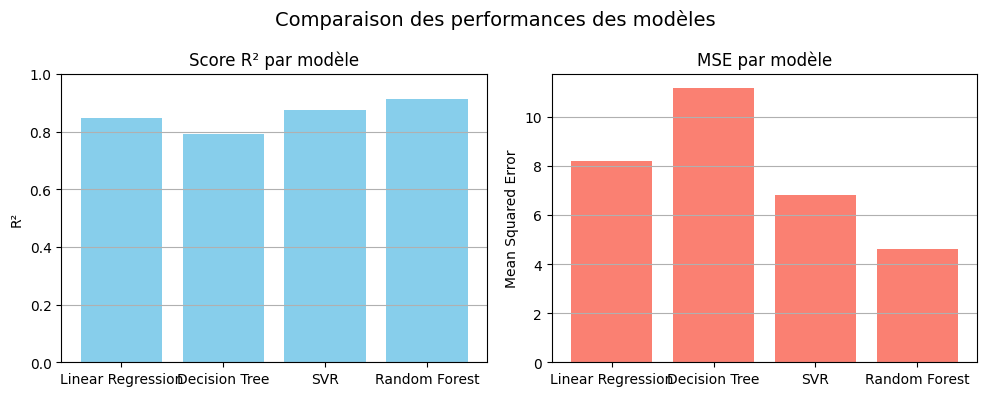

In [18]:
# Liste des modèles et de leurs prédictions
model_names = ["Linear Regression", "Decision Tree", "SVR", "Random Forest"]
predictions = [y_pred_lr, y_pred_dt, y_pred_svr, y_pred_rf]

# Calcul des scores
r2_scores = [r2_score(y_test, y_pred) for y_pred in predictions]
mse_scores = [mean_squared_error(y_test, y_pred) for y_pred in predictions]

# 🔵 Bar chart R²
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(model_names, r2_scores, color='skyblue')
plt.title("Score R² par modèle")
plt.ylabel("R²")
plt.ylim(0, 1)
plt.grid(axis='y')

# 🔴 Bar chart MSE
plt.subplot(1, 2, 2)
plt.bar(model_names, mse_scores, color='salmon')
plt.title("MSE par modèle")
plt.ylabel("Mean Squared Error")
plt.grid(axis='y')

plt.suptitle("Comparaison des performances des modèles", fontsize=14)
plt.tight_layout()
plt.show()